In [49]:
import pandas as pd 
import numpy as np 


In [50]:
data = pd.read_csv('data.csv')

In [77]:
data

,Date,Cases,Day,x1,Prediction
0,Feb 15,0,1,1,3.411252
1,Feb 16,0,2,1,6.810454
2,Feb 17,0,3,1,10.209655
3,Feb 18,0,4,1,13.608857
4,Feb 19,0,5,1,17.008058
...,...,...,...,...,...
307,Dec 18,342,308,1,1046.966117
308,Dec 19,342,309,1,1050.365318
309,Dec 20,330,310,1,1053.764520
310,Dec 21,302,311,1,1057.163721


In [51]:
alpha = 0.00005
lamb = 10000
m = 312
import numpy as np
x2 = data[['Day' , 'x1']].to_numpy() 
x = data['Day'].to_numpy()
x1 = data['x1'].to_numpy()
y = data['Cases'].to_numpy()
w0 = np.array([0])
w1 = np.array([0])

In [52]:
tau = 100
X = np.average(x2)
xx = -(((x - X)*(x - X))/(tau*tau))
qw = np.exp(xx)

In [53]:
qw

array([0.54634412, 0.55485068, 0.563377  , 0.57191995, 0.58047633,
       0.58904291, 0.59761637, 0.60619337, 0.6147705 , 0.62334431,
       0.6319113 , 0.64046792, 0.64901059, 0.65753568, 0.66603953,
       0.67451845, 0.6829687 , 0.69138652, 0.69976812, 0.7081097 ,
       0.71640742, 0.72465743, 0.73285585, 0.74099882, 0.74908243,
       0.75710279, 0.765056  , 0.77293815, 0.78074534, 0.78847368,
       0.79611928, 0.80367827, 0.81114678, 0.81852098, 0.82579704,
       0.83297117, 0.8400396 , 0.84699859, 0.85384445, 0.8605735 ,
       0.86718213, 0.87366677, 0.88002387, 0.88624996, 0.89234161,
       0.89829546, 0.90410819, 0.90977656, 0.91529739, 0.92066757,
       0.92588407, 0.93094391, 0.93584422, 0.94058218, 0.94515509,
       0.94956029, 0.95379525, 0.95785751, 0.9617447 , 0.96545455,
       0.9689849 , 0.97233367, 0.9754989 , 0.97847871, 0.98127135,
       0.98387517, 0.98628862, 0.98851027, 0.99053879, 0.99237298,
       0.99401175, 0.99545411, 0.99669921, 0.99774629, 0.99859

In [54]:
n = 10
for i in range(0, n):
  print('interation number',i)
    
  yp = (((w0 * x1) + (w1 * x) ) - y)*x1*qw
  yk = (((w0 * x1) + (w1 * x) ) - y)*x*qw
  w0 = w0  - ((alpha/m)*(np.sum(yp)))
  w1 = w1  - ((alpha/m)*(np.sum(yk)))
  print('w0' , w0 )
  print('w1' , w1)

interation number 0
w0 [0.00684798]
w1 [1.07530805]
interation number 1
w0 [0.01115102]
w1 [1.81895992]
interation number 2
w0 [0.01369408]
w1 [2.33324904]
interation number 3
w0 [0.01501998]
w1 [2.68891821]
interation number 4
w0 [0.01550415]
w1 [2.93489093]
interation number 5
w0 [0.0154062]
w1 [3.10500109]
interation number 6
w0 [0.01490568]
w1 [3.22264715]
interation number 7
w0 [0.01412676]
w1 [3.30401071]
interation number 8
w0 [0.0131553]
w1 [3.36028245]
interation number 9
w0 [0.0120507]
w1 [3.39920151]


In [72]:
def loc_ml(x):
  x1 = 1
  yp  = (w0*x1) + (w1*x)
  return yp

In [74]:
loc_ml(400)

array([1359.69265577])

In [75]:
data['Prediction'] = loc_ml(x)

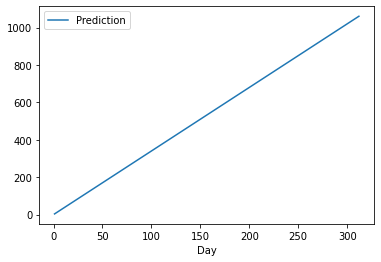

In [76]:
data.plot(x = 'Day' , y = 'Prediction')

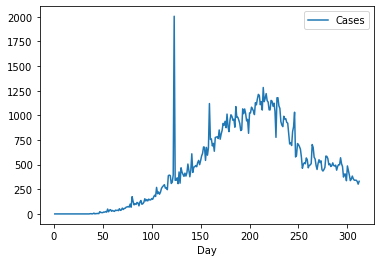

In [78]:
data.plot(x = 'Day' , y = 'Cases')